1. pustaka program decision tree

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

2. Loading Dataset

In [36]:
# menghubungkan colab ke gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# memanggil data set lewat gdrive
path = "/content/drive/MyDrive/ML_praktikum/praktikum05"

In [38]:
# membaca file csv menggunakan pandas

df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


3. data preprocessing

In [40]:
# cek missing value
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [41]:
# cek duplicate
df.duplicated().sum()

np.int64(7308)

In [52]:
# menghapus data duplicate
df = df.drop_duplicates()

In [43]:
  #cek duplicate ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [53]:
# rename columns
df = df.rename(columns={
    'Jenis Kelamin':'jenis_kelamin',
    'Umur (bulan)':'umur_bulan',
    'Tinggi Badan':'tinggi_cm',
    'Berat Badan':'berat_kg',
    'Stunting':'stunting',
    'Wastat':'wasting'
})

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92692 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   jenis_kelamin      92692 non-null  int8   
 1   umur_bulan         92692 non-null  int64  
 2   Tinggi Badan (cm)  92692 non-null  float64
 3   Berat Badan (kg)   92692 non-null  float64
 4   stunting           92692 non-null  int8   
 5   Wasting            92692 non-null  object 
dtypes: float64(2), int64(1), int8(2), object(1)
memory usage: 3.7+ MB


4. data understanding(Exploratory Data Analysis)

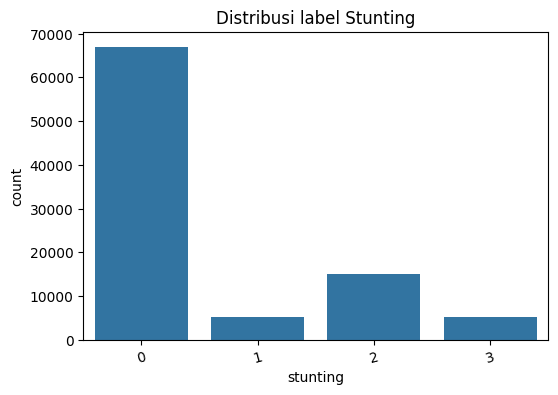

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

5. Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [56]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories) #urutkan kelas
df['stunting'] = stunting_cat.cat.codes # y numerik

for col in ['jenis_kelamin', 'wasting']:
  if col in df.columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,jenis_kelamin,umur_bulan,Tinggi Badan (cm),Berat Badan (kg),stunting,Wasting
0,0,19,91.6,13.3,3,Risk of Overweight
1,0,20,77.7,8.5,2,Underweight
2,0,10,79.0,10.3,0,Risk of Overweight
3,1,2,50.3,8.3,1,Risk of Overweight
4,1,5,56.4,10.9,1,Risk of Overweight


6. Analisis Korelasi Antar Fitur

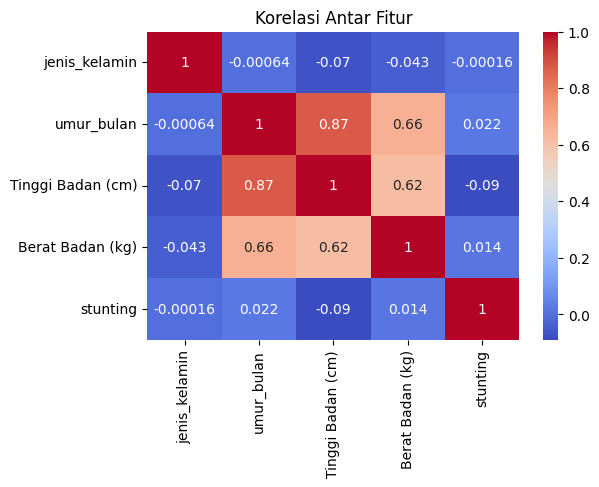

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

7. Splitting Data (Pembagian Data Training dan Testing)

In [59]:
# Cek nama kolom yang ada di dataset
print(df.columns.tolist())

['jenis_kelamin', 'umur_bulan', 'Tinggi Badan (cm)', 'Berat Badan (kg)', 'stunting', 'Wasting']


In [60]:
df = df.rename(columns={
    'Tinggi Badan (cm)': 'tinggi_cm',
    'Berat Badan (kg)': 'berat_kg'
})

In [62]:
# Memilih fitur dan target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg']
X = df[feature_cols]
y = df['stunting']

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)

(74153, 18539)

8. Pembuatam Model Decission Tree

In [63]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

9. Evaluasi Model Decision Tree

In [66]:
# Evaluasi
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=['0', '1', '2', '3']
))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88     13411
           1       1.00      0.02      0.05      1067
           2       0.59      0.45      0.51      3008
           3       0.80      0.11      0.20      1053

    accuracy                           0.78     18539
   macro avg       0.80      0.39      0.41     18539
weighted avg       0.78      0.78      0.73     18539



In [65]:
df['stunting'].astype('category').cat.categories

Index([0, 1, 2, 3], dtype='int8')

10. Vsisualisasi Hasil MOdel Decision Tree

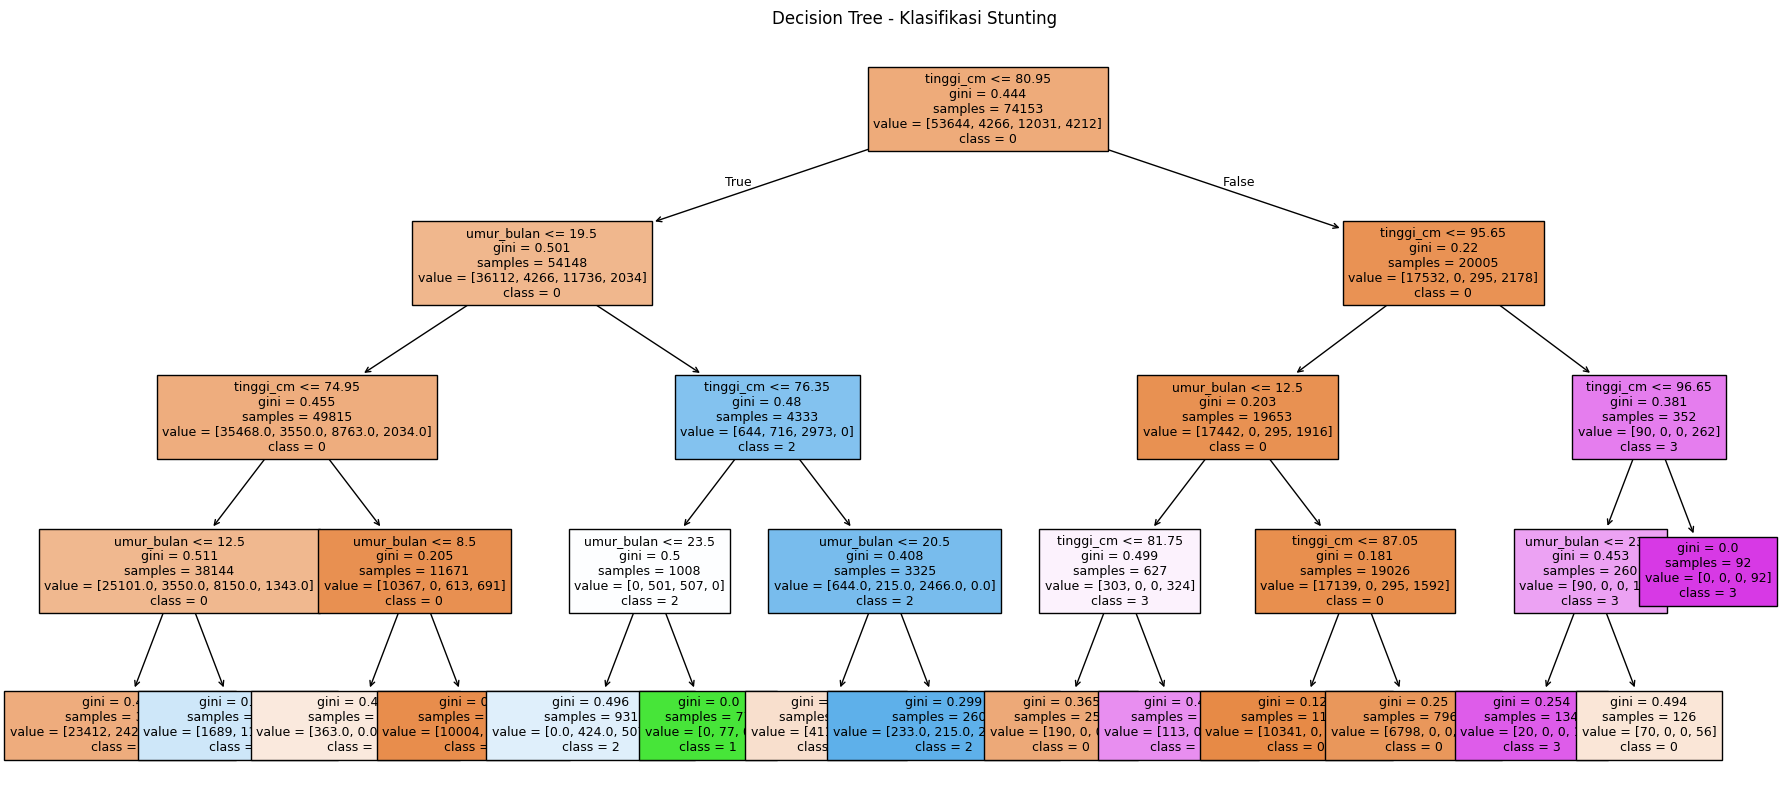

In [68]:
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=['0', '1', '2', '3'],  # ubah jadi string
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()


11. Feature Importance (Fitur yang Paling Berpengaruh)

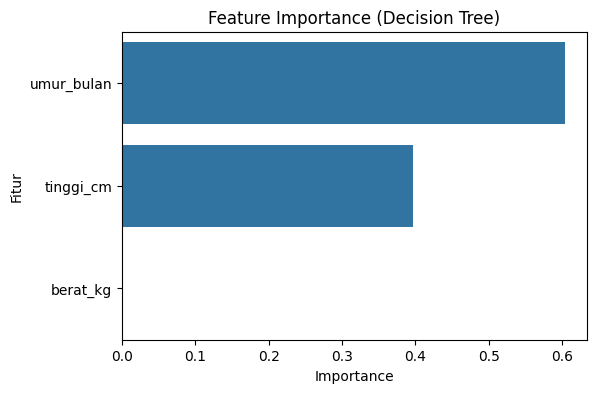

In [69]:
# Fitur yang penting
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

12. Hyperparameter Tuning (Menentukan max_depth Terbaik)

In [70]:
scores = {}
for d in range(2, nine := 9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

scores
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")

Best max_depth: 8 | Acc: 84.21 %
